In [2]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')
df

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,NaN,...,19793.00,A,20053.00,A,29203.00,A,22134.00,A,21685.00,I
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5419,Yield,hg/ha,NaN,...,13788.00,A,17161.00,A,13083.00,A,17759.00,A,18748.00,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,tonnes,NaN,...,27291.00,A,34413.00,A,38205.00,A,39307.00,A,40655.23,I
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,NaN,...,26160.00,I,25220.00,E,27387.00,I,26255.00,E,26287.00,E
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5419,Yield,hg/ha,NaN,...,6970.00,E,7866.00,E,6902.00,E,7409.00,E,7379.00,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,5817,'902,Net Food Importing Developing Countries,1729,'F1729,"Treenuts, Total",5419,Yield,hg/ha,6118.0,...,5927.00,E,5338.00,E,5346.00,E,5426.00,E,5515.00,E
79293,5817,'902,Net Food Importing Developing Countries,1729,'F1729,"Treenuts, Total",5510,Production,tonnes,255724.0,...,2299639.12,E,2495666.54,E,2314274.21,E,2479586.92,E,2498539.75,E
79294,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5312,Area harvested,ha,1877800.0,...,7217374.00,E,7429029.00,E,7543355.00,E,7710160.00,E,7978161.00,E
79295,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5419,Yield,hg/ha,66297.0,...,116623.00,E,116194.00,E,117830.00,E,117831.00,E,117360.00,E


In [2]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')
df2 = df.dropna(how = 'any') # removing all missing data 
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. Big loss of information!! 
df2 = pd.melt(df2, id_vars=['Area', "Item", "Element", "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})
df2

,Area,Item,Element,Unit,Year,yield_amound
0,Afghanistan,Apples,Area harvested,ha,1961,2220.00
1,Afghanistan,Apples,Yield,hg/ha,1961,68018.00
2,Afghanistan,Apples,Production,tonnes,1961,15100.00
3,Afghanistan,Apricots,Area harvested,ha,1961,4820.00
4,Afghanistan,Apricots,Yield,hg/ha,1961,66390.00
...,...,...,...,...,...,...
1772777,Zimbabwe,Sugar Crops Primary,Yield,hg/ha,2021,734043.00
1772778,Zimbabwe,Sugar Crops Primary,Production,tonnes,2021,3450000.00
1772779,Zimbabwe,Vegetables Primary,Area harvested,ha,2021,35148.00
1772780,Zimbabwe,Vegetables Primary,Yield,hg/ha,2021,66770.00


In [3]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr.dropna(how = 'any') # removing all missing data 
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})

In [4]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.dropna(how = 'any') # removing all missing data 
di2 = di2.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 
di2

,Year,Area,avg_temp
0,1849,CÃ´te D'Ivoire,25.58
1,1850,CÃ´te D'Ivoire,25.52
2,1851,CÃ´te D'Ivoire,25.67
7,1856,CÃ´te D'Ivoire,26.28
8,1857,CÃ´te D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [5]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"])
merged = pd.merge(di2, merged, on= ["Area", "Year"])
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


We have yields that are expressed in tonnes, head... I propose that we keep only the data in tonnes at first 

In [6]:
merged=merged[(merged['Unit_x']=='tonnes')]
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
24,1990,Ghana,26.73,Avocados,Production,tonnes,5900.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
25,1990,Ghana,26.73,Avocados,Production,tonnes,5900.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
26,1990,Ghana,26.73,Avocados,Production,tonnes,5900.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
27,1990,Ghana,26.73,Avocados,Production,tonnes,5900.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
28,1990,Ghana,26.73,Avocados,Production,tonnes,5900.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


### Short statistics and data visualisation  

In [7]:
merged.describe()

,Year,avg_temp,yield_amound,pesticide_amound
count,5.936794e+06,5.936794e+06,5.936794e+06,5.936794e+06
mean,2.001220e+03,1.918180e+01,8.092679e+06,1.704280e+04
std,6.795321e+00,6.993847e+00,3.618270e+07,4.579959e+04
min,1.990000e+03,-3.370000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,1.431000e+01,2.915700e+04,4.400000e+01
50%,2.001000e+03,2.002000e+01,2.631090e+05,9.700000e+02
75%,2.007000e+03,2.579000e+01,2.120767e+06,8.775570e+03
max,2.013000e+03,3.042000e+01,7.680904e+08,3.677780e+05


In [8]:
data=merged[(merged['Area']=='Ghana')| (merged['Area']=='Namibia')| (merged['Area']=='Mauritania')]

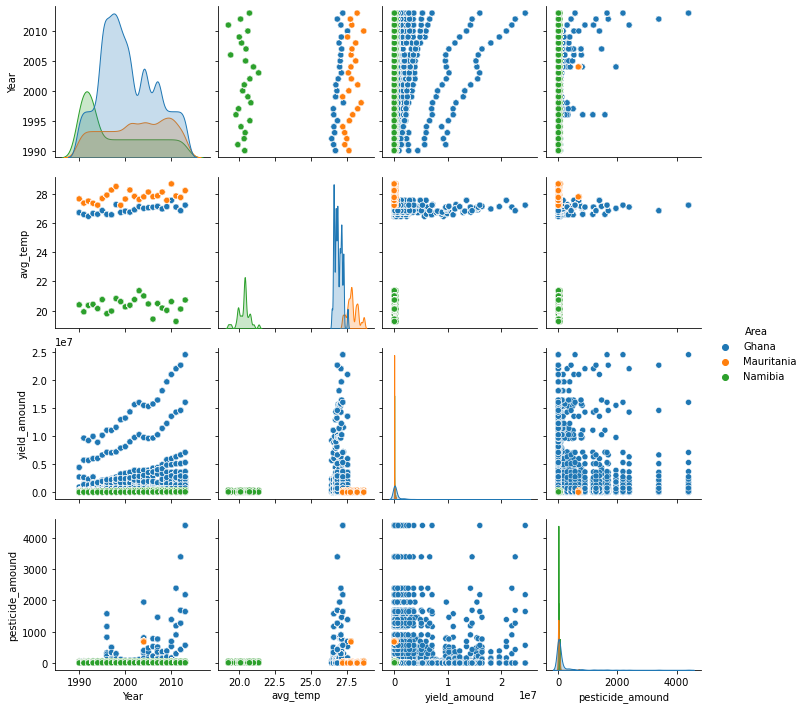

In [9]:
sns.pairplot(data, hue='Area');

regrouper les pays par region (europe,Amerique ... )
reussir a ajouter les precipitations 

By country 

In [10]:
A=merged.groupby("Area")[[ "avg_temp", "yield_amound"]].mean()
A

,avg_temp,yield_amound
Area,,
Albania,16.319345,8.235553e+04
Algeria,17.512500,3.774491e+05
Angola,24.269702,3.155262e+05
Argentina,17.755890,2.048710e+06
Australia,16.592083,1.746777e+06
...,...,...
Tunisia,19.516667,1.645500e+05
Uganda,23.766218,7.279063e+05
Uruguay,16.968701,1.985153e+05


<AxesSubplot:xlabel='Area'>

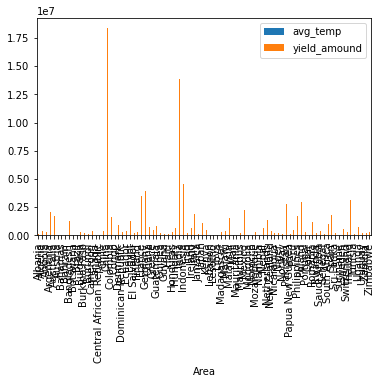

In [11]:
A.plot(kind='bar')

By type of crop 

In [12]:
B=merged.groupby("Item_x")[[ "yield_amound",'pesticide_amound']].mean()
B


,yield_amound,pesticide_amound
Item_x,,
"Abaca, manila hemp, raw",2.532897e+04,1702.842908
"Agave fibres, raw, n.e.c.",7.445839e+03,3885.583275
"Almonds, in shell",3.777862e+04,29701.648264
"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",1.216693e+05,26117.511072
Apples,4.525954e+06,15487.367980
...,...,...
"Walnuts, in shell",1.507870e+05,22222.672078
Watermelons,9.248784e+06,17395.801498
Wheat,3.437093e+07,14126.806138


<AxesSubplot:xlabel='Item_x'>

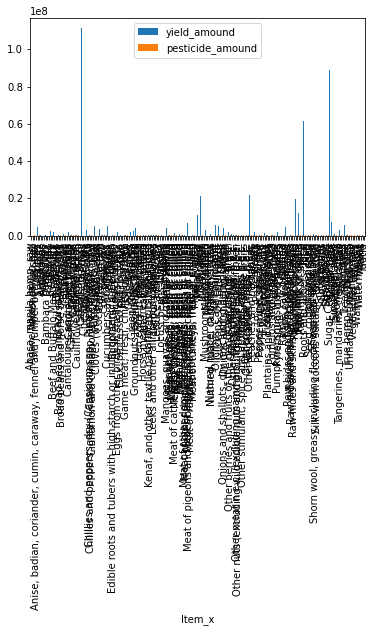

In [13]:
B.plot(kind='bar')

yield as a function of temperature

In [19]:
data=merged[merged['Area']=='China']
data=data[(data['Item_x']=='Wheat')|(data['Item_x']=='Rice')]
data


,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
4093000,1990,China,8.66,Rice,Production,tonnes,191614680.0,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,154560.89
4093001,1990,China,8.66,Rice,Production,tonnes,191614680.0,Pesticides Use,Agricultural Use,Insecticides,tonnes,42394.70
4093002,1990,China,8.66,Rice,Production,tonnes,191614680.0,Pesticides Use,Agricultural Use,Mineral Oils,tonnes,40592.00
4093003,1990,China,8.66,Rice,Production,tonnes,191614680.0,Pesticides Use,Agricultural Use,Herbicides,tonnes,64280.25
4093004,1990,China,8.66,Rice,Production,tonnes,191614680.0,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,39817.94
...,...,...,...,...,...,...,...,...,...,...,...,...
6648559,2013,China,16.86,Wheat,Production,tonnes,121930527.0,Pesticides Use,Agricultural Use,Insecticides â Seed Treatments,tonnes,6034.00
6648560,2013,China,16.86,Wheat,Production,tonnes,121930527.0,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,3753.85
6648561,2013,China,16.86,Wheat,Production,tonnes,121930527.0,Pesticides Use,Agricultural Use,Rodenticides,tonnes,2200.05
6648562,2013,China,16.86,Wheat,Production,tonnes,121930527.0,Pesticides Use,Agricultural Use,Disinfectants,tonnes,1227.00


<AxesSubplot:xlabel='avg_temp', ylabel='yield_amound'>

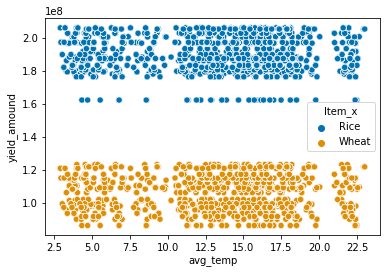

In [20]:
sns.scatterplot(data=data, x='avg_temp', y='yield_amound', hue='Item_x', palette="colorblind")

Now we can try to look at each year 

In [21]:
data=data[data['Item_x']=='Rice']
data

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
4093000,1990,China,8.66,Rice,Production,tonnes,1.916147e+08,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,154560.89
4093001,1990,China,8.66,Rice,Production,tonnes,1.916147e+08,Pesticides Use,Agricultural Use,Insecticides,tonnes,42394.70
4093002,1990,China,8.66,Rice,Production,tonnes,1.916147e+08,Pesticides Use,Agricultural Use,Mineral Oils,tonnes,40592.00
4093003,1990,China,8.66,Rice,Production,tonnes,1.916147e+08,Pesticides Use,Agricultural Use,Herbicides,tonnes,64280.25
4093004,1990,China,8.66,Rice,Production,tonnes,1.916147e+08,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,39817.94
...,...,...,...,...,...,...,...,...,...,...,...,...
6648031,2013,China,16.86,Rice,Production,tonnes,2.052017e+08,Pesticides Use,Agricultural Use,Insecticides â Seed Treatments,tonnes,6034.00
6648032,2013,China,16.86,Rice,Production,tonnes,2.052017e+08,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,3753.85
6648033,2013,China,16.86,Rice,Production,tonnes,2.052017e+08,Pesticides Use,Agricultural Use,Rodenticides,tonnes,2200.05
6648034,2013,China,16.86,Rice,Production,tonnes,2.052017e+08,Pesticides Use,Agricultural Use,Disinfectants,tonnes,1227.00


<AxesSubplot:xlabel='avg_temp', ylabel='yield_amound'>

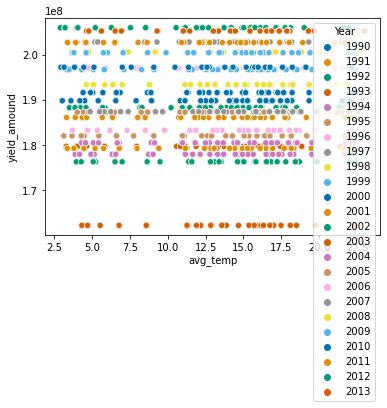

In [22]:
sns.scatterplot(data=data, x='avg_temp', y='yield_amound', hue='Year', palette="colorblind")

### PCA

I think that to start with you have to analyse the different components and for that you can use a PCA

In [33]:
df = merged[[ "Year", "avg_temp", "yield_amound","pesticide_amound"]]
df_2= merged[[ "Year", "Area", "avg_temp", "yield_amound","pesticide_amound"]]
df

,Year,avg_temp,yield_amound,pesticide_amound
24,1990,26.73,5900.00,65.8
25,1990,26.73,5900.00,32.4
26,1990,26.73,5900.00,8.0
27,1990,26.73,5900.00,25.0
28,1990,26.73,5900.00,0.0
...,...,...,...,...
15893010,2013,20.73,60587.49,9.0
15893011,2013,20.73,60587.49,17.0
15893012,2013,20.73,60587.49,18.0
15893013,2013,20.73,60587.49,4.0


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
yiel_scaled = StandardScaler().fit_transform(df)
# As a result, we obtained a two-dimensional NumPy array. We can convert it to a pandas DataFrame for a better display.
df_scaled = pd.DataFrame(data=yield_scaled, 
                                columns=df.columns)
df_scaled.head()

,Year,avg_temp,yield_amound,pesticide_amound
0,-1.651206,1.079263,-0.223499,-0.370680
1,-1.651206,1.079263,-0.223499,-0.371409
2,-1.651206,1.079263,-0.223499,-0.371942
3,-1.651206,1.079263,-0.223499,-0.371571
4,-1.651206,1.079263,-0.223499,-0.372117


In [29]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [30]:
pca_yield = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_yield.head(6)

,PC1,PC2
0,-1.604040,0.335925
1,-1.604513,0.335932
2,-1.604859,0.335937
3,-1.604618,0.335933
4,-1.604972,0.335938
5,-1.604972,0.335938


Text(0, 0.5, 'PC2')

c:\Users\aliss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


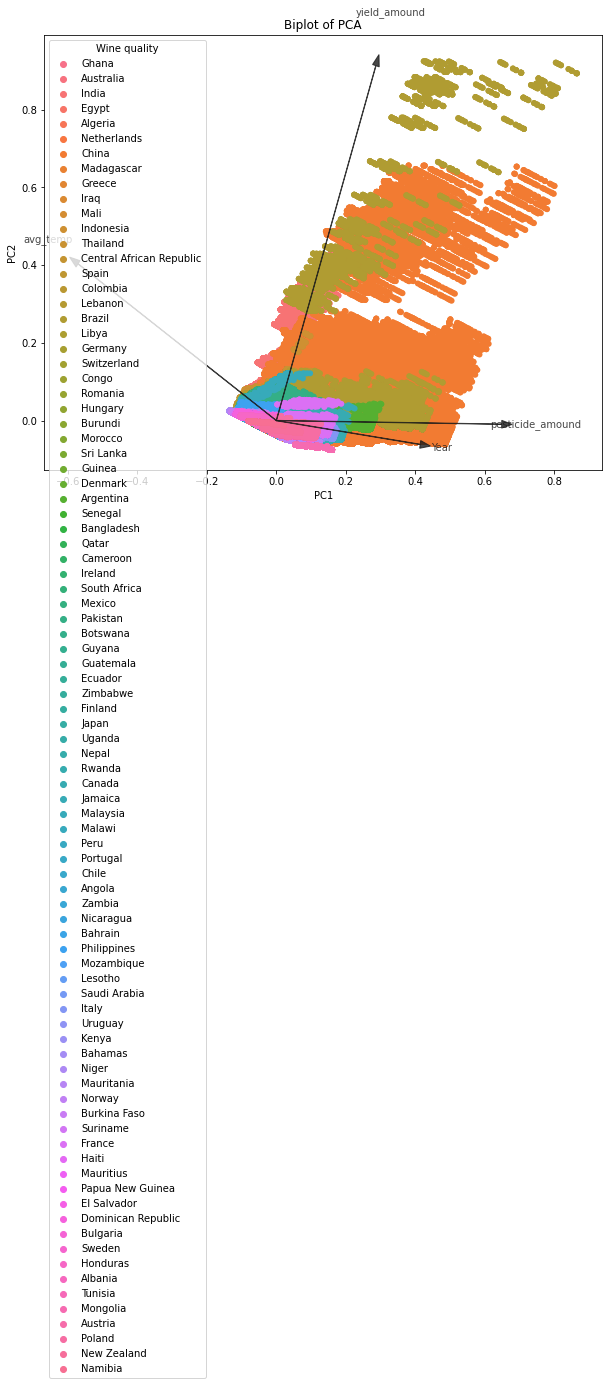

In [36]:
PC1 = pca_yield['PC1']/(pca_yield['PC1'].max() - pca_yield['PC1'].min())
PC2 = pca_yield['PC2']/(pca_yield['PC2'].max() - pca_yield['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = df_2['Area'].tolist(),
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(df.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Area')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))